In [30]:
import numpy
import matplotlib.pyplot as plt

numpy.random.seed(2)

$f(x) = x^2 + 10\sin(x)$

In [41]:
def grad(x):
    return 2*x + 10*numpy.cos(x)

def func(x):
    return x**2 + 10*numpy.sin(x)

# Gradient Descent without Momentum
def GD(grad, x0, eta = 0.1):
    x = [x0]
    for turn in range(100):
        x_new = x[-1] - eta*grad(x[-1])
        if (numpy.abs(grad(x_new)) < 1e-3):
            break
        x.append(x_new)
        
    x = numpy.asarray(x)
    return (x, turn)

gd_without_momentum = GD(grad, x0 = 5, eta = 0.1)

# Gradient Descent optimized with Momentum
def Momentum(grad, x0, eta = 0.1, gamma = 0.9):
    velocity = [0]
    x = [x0]
    for turn in range(100):
        velo_new = gamma*velocity[-1] + eta*grad(x[-1])
        x_new = x[-1] - velo_new
        if (numpy.abs(grad(x_new)) < 1e-3):
            break
        x.append(x_new)
        velocity.append(velo_new)
        
    velocity = numpy.asarray(velocity)
    x = numpy.asarray(x)
    return (x, velocity, turn)
        
gd_with_momentum = Momentum(grad, x0 = 5, eta = 0.1, gamma = 0.9)
# print(gd_with_momentum[0][-1])

#Gradient Descent with NAG
def NAG(grad, x0, eta = 0.1, gamma = 0.9):
    velocity = [0]
    x = [x0]
    for turn in range(100):
        velo_new = gamma*velocity[-1] + eta*grad(x[-1] - gamma*velocity[-1])
        x_new = x[-1] - velo_new
        if (numpy.abs(grad(x_new)) < 1e-3):
            break
        x.append(x_new)
        velocity.append(velo_new)
    
    velocity = numpy.asarray(velocity)
    x = numpy.asarray(x)
    return (x, velocity, turn)

gd_with_NAG = NAG(grad, x0 = 5)


In [32]:
# Plot a function graph
def plot_func(func, xmin = -5, xmax = 5,xaxis = True, opts = 'b-', title = '', grid = False):
    x = numpy.linspace(xmin, xmax, (xmax - xmin)*1000)
    y = func(x)
    ymax = numpy.max(y) + 2
    ymin = numpy.min(y) - 2 
    if (title != ''):
        plt.title(title)
    plt.axis([xmin, xmax, ymin, ymax])
    if (grid):
        plt.grid()
    if (xaxis):
        plt.plot([xmin, xmax], [0, 0], 'k')
    plt.plot(x, y, opts)

plot_func(func, xmin = -6, xmax = 7,title = r'$f(x) = x^2 + 10\sin(x)$', grid = True)

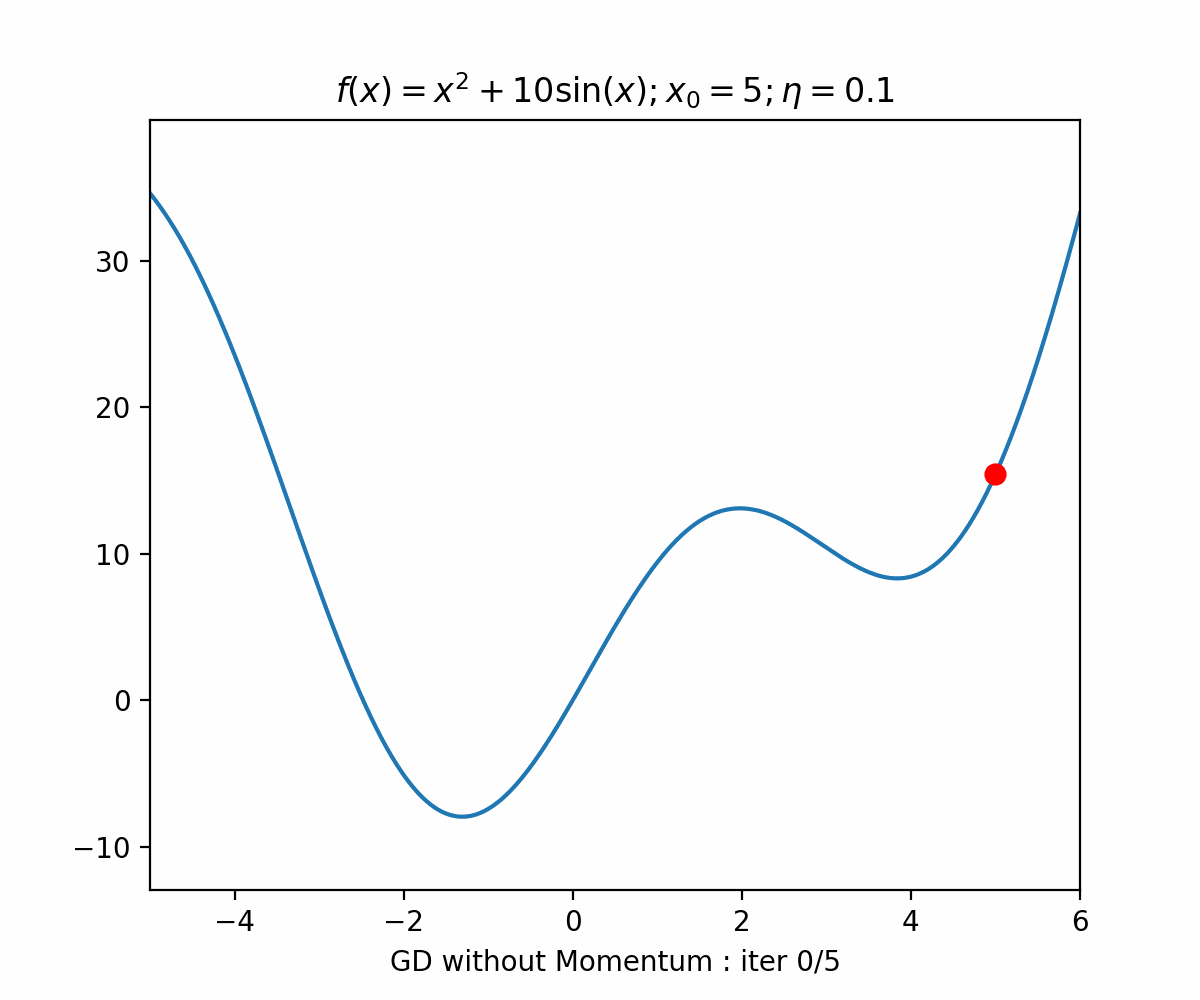

In [35]:
# GD example
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
from IPython.display import Image, display

def visualize_gd(func, x, filename, title, xmin = -5, xmax = 5 , frame_rate = 5):
    numTurn = len(x)
    y = func(x)
    
    x_plot = numpy.linspace(xmin,xmax,(xmax - xmin)*1000)
    y_plot = func(x_plot)
    ymin = numpy.min(y_plot) - 5
    ymax = numpy.max(y_plot) + 5
    
    figure, axes = plt.subplots(figsize=(6,5))
    
    def update_frame(turn):
        fig = plt.cla()
        plt.axis([xmin, xmax, ymin, ymax])
        plt.plot(x_plot, y_plot)
        plt.title(r'$f(x) = x^2 + 10\sin(x); x_{0} = 5; \eta = 0.1$')
        if (turn == 0):
            fig = plt.plot(x[turn], y[turn], 'ro', markersize = 7)
        else:
            fig = plt.plot(x[turn-1], y[turn-1], 'ok', markersize = 7)
            fig = plt.plot(x[turn-1 : turn+1], y[turn-1 : turn+1], 'k-')
            fig = plt.plot(x[turn], y[turn], 'ro', markersize = 7)
        
        label = f'{title} : iter {turn}/{numTurn}' 
        axes.set_xlabel(label)
        return fig, axes
    
    create_ani = FuncAnimation(figure, update_frame, frames = numpy.arange(numTurn), interval = (1000//frame_rate))
    create_ani.save(filename, dpi = 200, writer = 'pillow')
    
    plt.ioff()
    display(Image(filename, width = 500, height = 500))
    
visualize_gd(func, gd_without_momentum[0], filename = 'Image/no_momentum.gif', title = 'GD without Momentum', xmin = -5, xmax = 6)
    

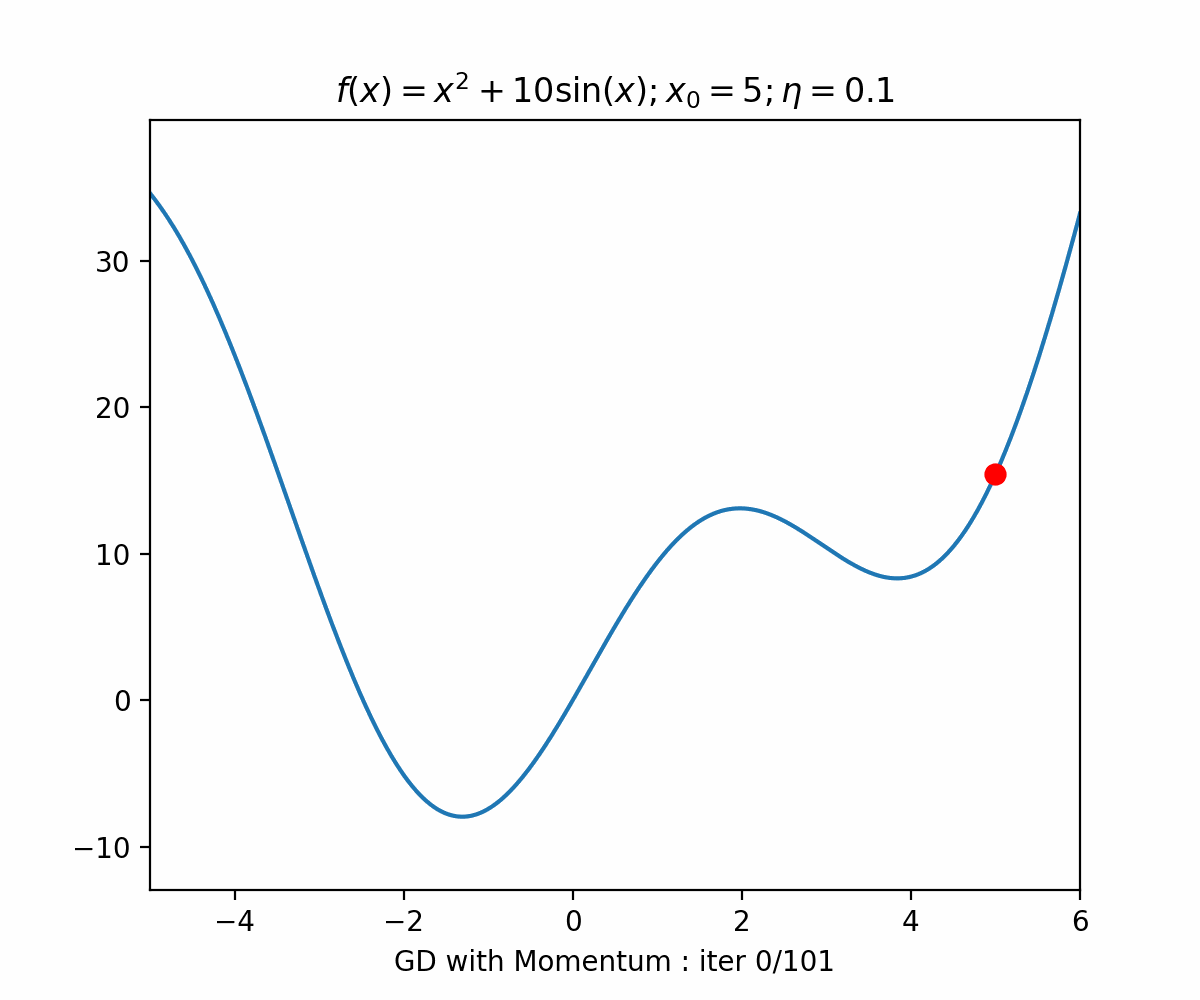

In [39]:
# GD with Momentum
visualize_gd(func, gd_with_momentum[0], xmin = -5, xmax = 6, filename = 'Image/gd_momentum.gif', title = 'GD with Momentum', frame_rate = 5)

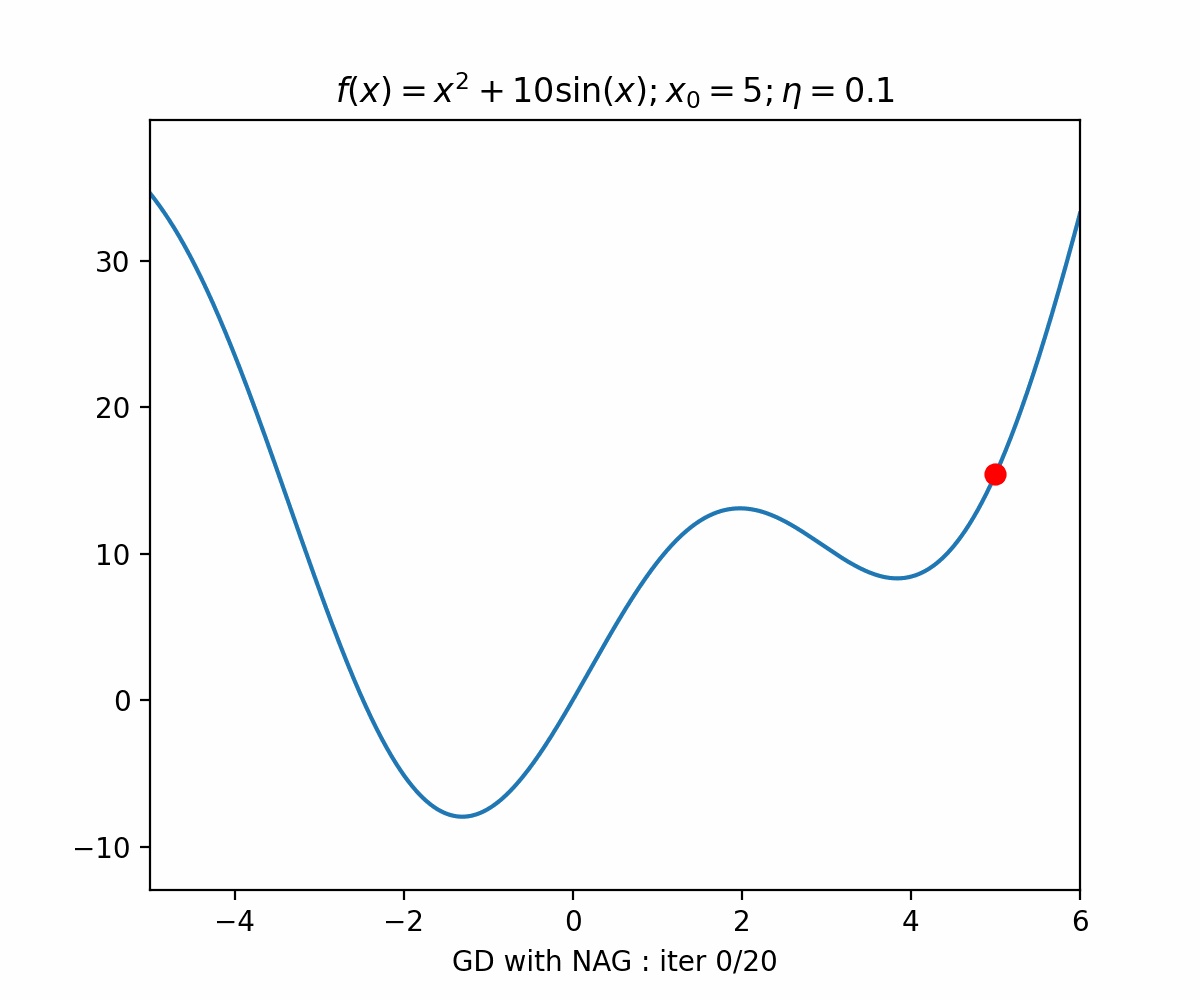

In [43]:
# GD with NAG
visualize_gd(func, gd_with_NAG[0], filename = 'Image/NAG.gif', title = 'GD with NAG', xmin = -5, xmax = 6)
plt.close()